# Spotify Song Attributes

Dataset: https://www.kaggle.com/datasets/geomack/spotifyclassification

Columns Description: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

## Context

A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I (dataset's author) like it and "0" for songs I don't like. I used this to data to see if I could build a classifier that could predict whether or not I would like a song.

In [144]:
import matplotlib.pyplot as plt  #visualisation
import pandas as pd
import seaborn as sns  #visualisation
import numpy as np
%matplotlib inline
sns.set(color_codes=True)

## Explore Datatypes

In [145]:
df = pd.read_csv('../input/spotifyclassification/data.csv')
df.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [146]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [147]:
display(df.describe())

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [148]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


None

## Columns Description

- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **duration_ms** - The duration of the track in milliseconds.
- **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **key** - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **target** - 1 if I like the song and 0 if I don't.

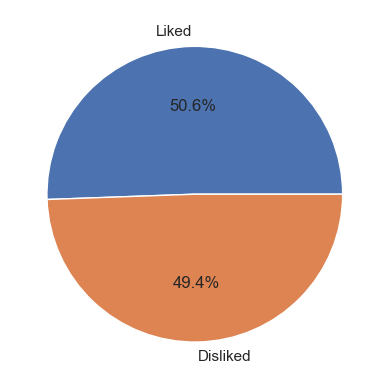

In [149]:
plt.pie(df['target'].value_counts(), labels=['Liked', 'Disliked'], autopct='%1.1f%%')
plt.show()

Number of Like and Dislike songs are almost equal.

## Plotting Distribution of Data

We need to split the data into discrete and continuous columns. Plotting them and comparing them with the target column.

In [150]:
discrete_cols = ['mode', 'key', 'time_signature']
df_continous = df.drop(discrete_cols, axis=1).drop(['target', 'Unnamed: 0', 'song_title', 'artist'], axis=1)
df_discrete = df[discrete_cols];

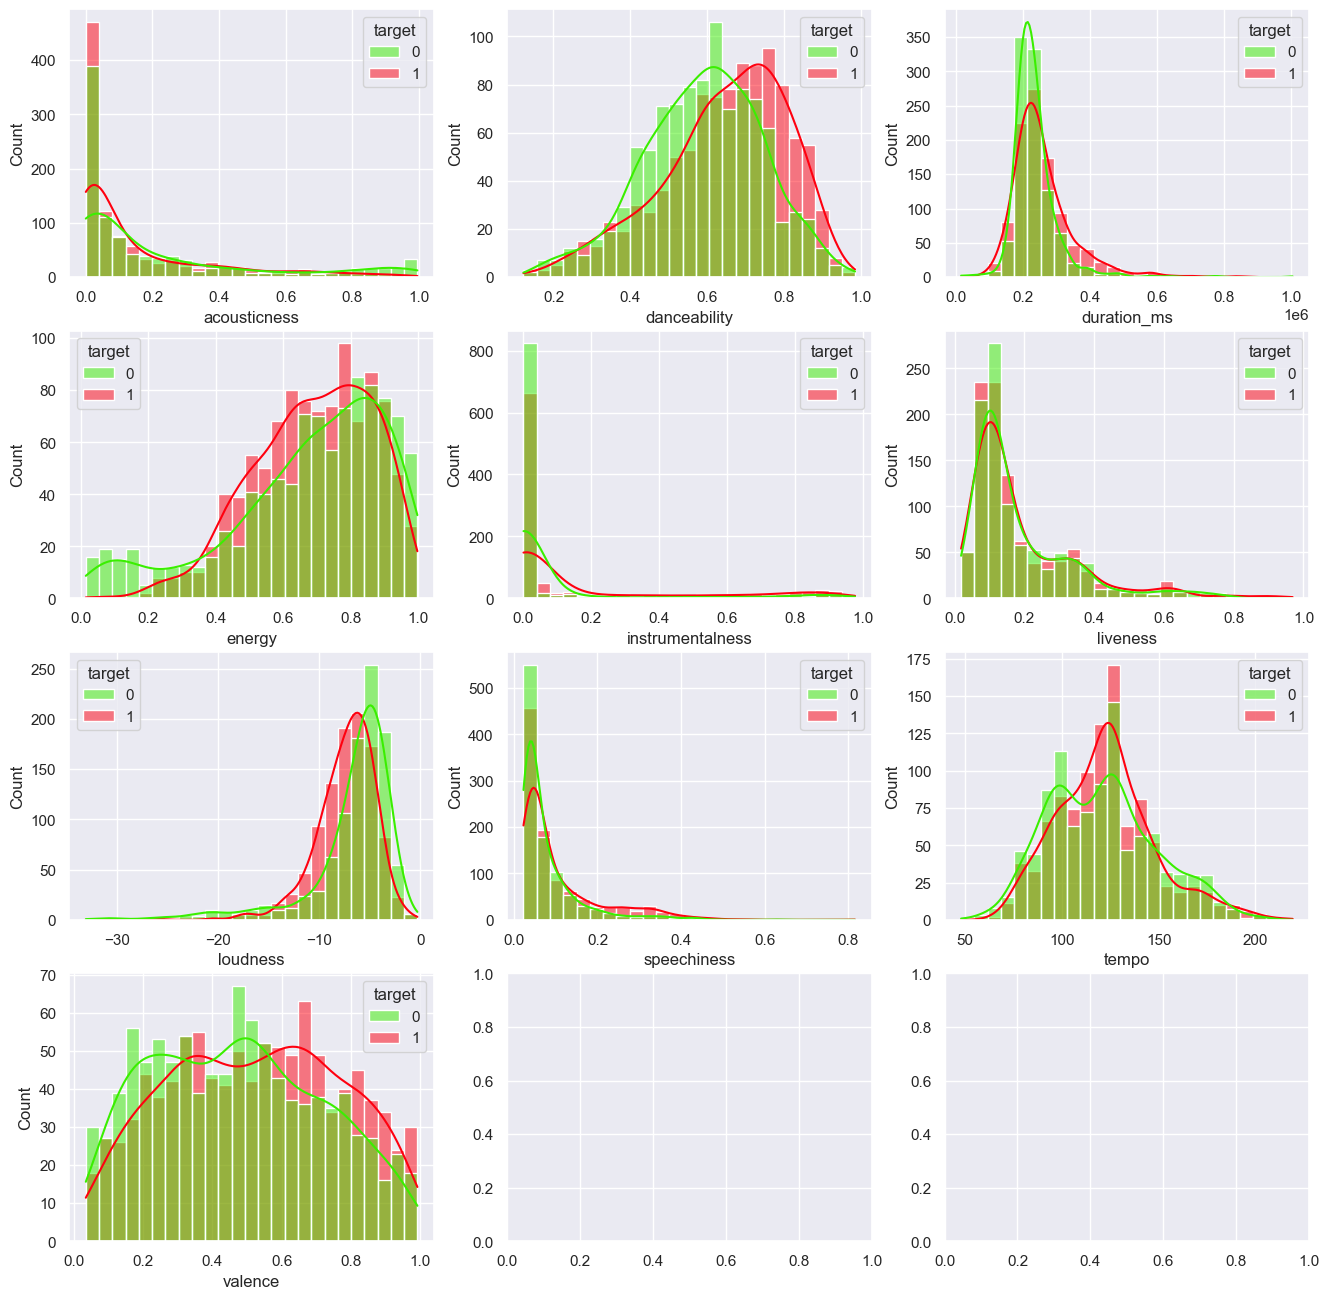

In [151]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
sns.set_palette('prism')
axes = axes.flatten()
ax_no = 0
num_cols = df_continous.select_dtypes('number').columns
for col in num_cols:
    sns.histplot(data=df_continous, x=col, bins=25, kde=True, ax=axes[ax_no], hue=df['target'])
    ax_no += 1
plt.show()

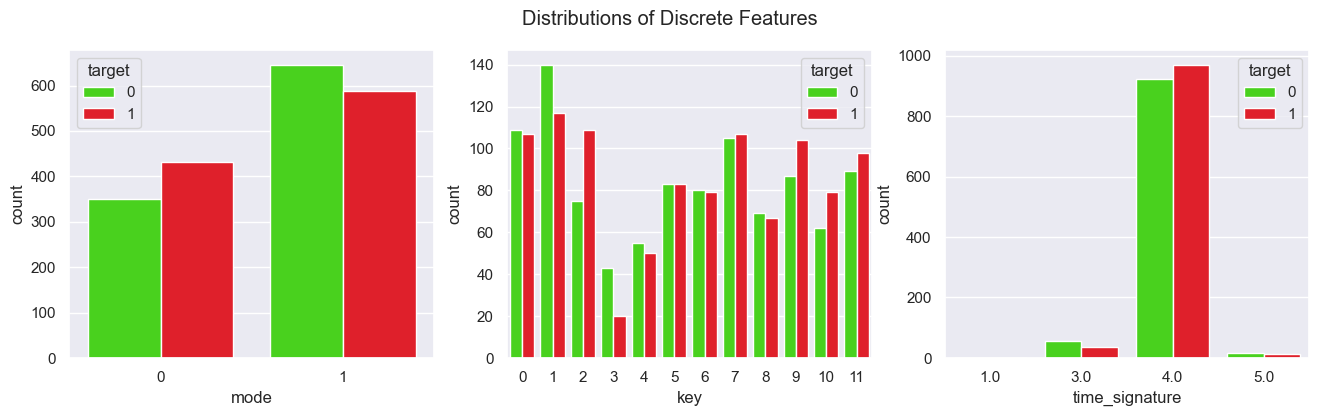

In [152]:
sns.set_palette('prism')
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Distributions of Discrete Features')
axes = axes.flatten()
ax_no = 0
num_cols = df_discrete.columns
for col in num_cols:
    sns.countplot(data=df_discrete, x=col, ax=axes[ax_no], hue=df['target'])
    ax_no += 1
plt.show()

'Like' and 'Dislike' songs are distributed similarly for all the columns.

## Correlation Matrix

Text(0.5, 1.0, 'Negative Correlations')

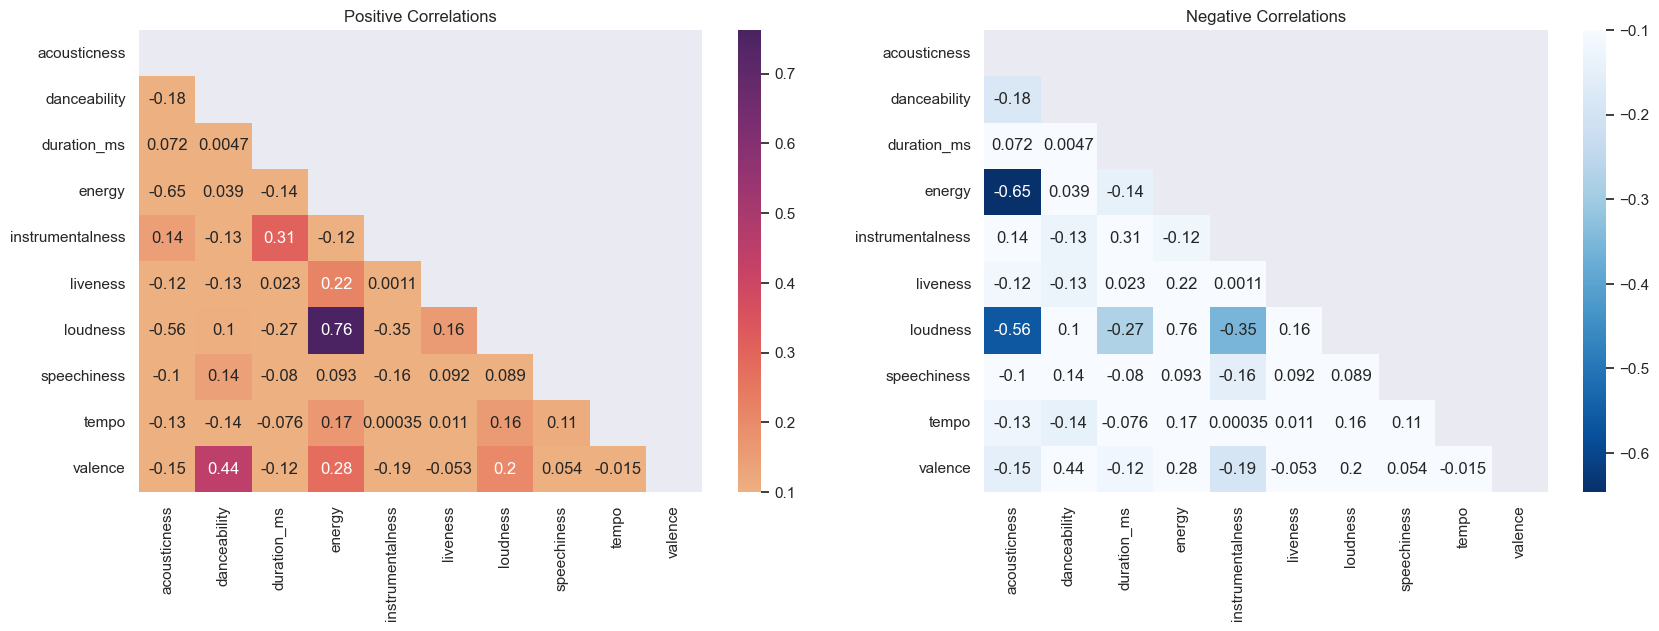

In [153]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
corr = df_continous.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data= corr, annot=True, cmap ='flare', ax = axes[0], mask = mask, vmin= 0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data= corr, annot=True, cmap ='Blues_r', ax = axes[1], mask = mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

### Positive Correlations
- **loudness** and **energy** are highly correlated.
- **danceability** and **valance** are highly correlated.

### Negative Correlations
- **acousticness** and **energy** are highly correlated.
- **acousticness** and **loudness** are highly correlated.

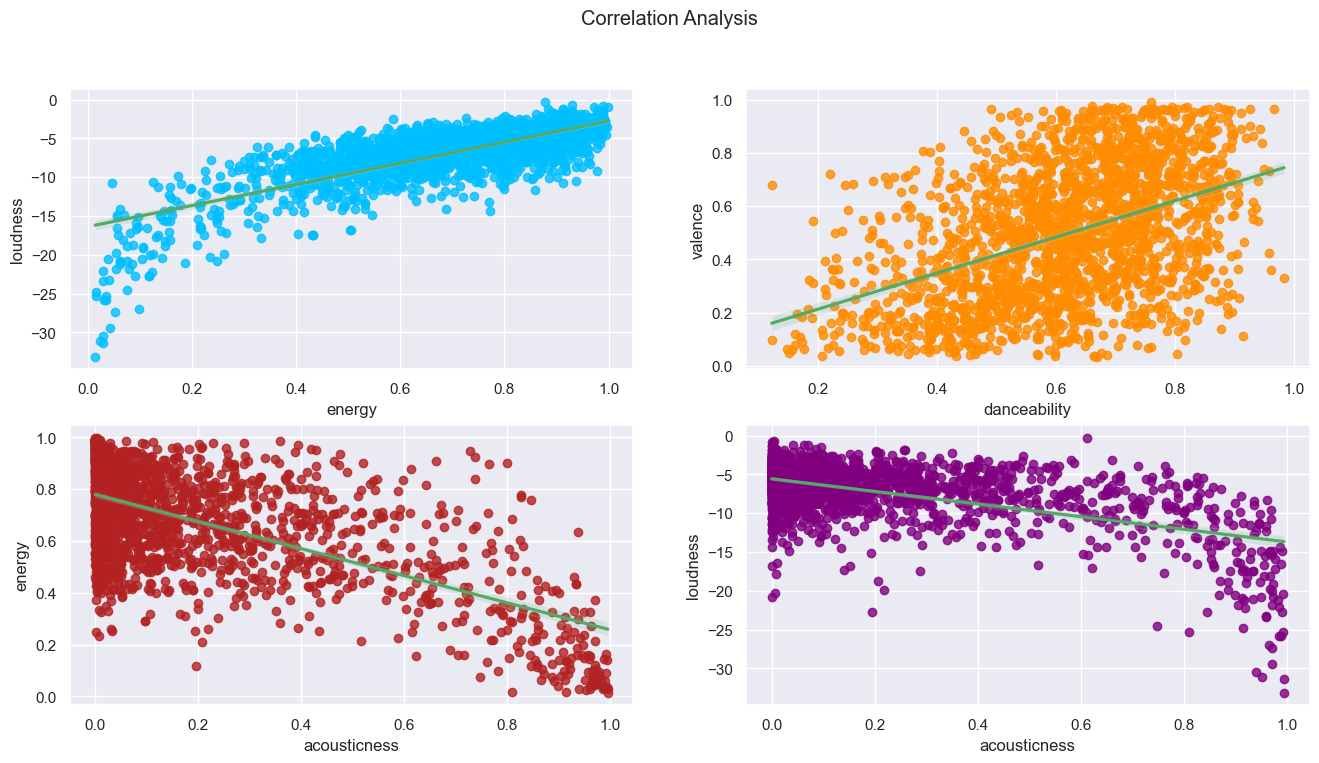

In [154]:
correlation_map = [
    {
        'x': 'energy',
        'y': 'loudness',
    },
    {
        'x': 'danceability',
        'y': 'valence',
    },
    {
        'x': 'acousticness',
        'y': 'energy',
    },
    {
        'x': 'acousticness',
        'y': 'loudness',
    }
]

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Correlation Analysis')
axes = axes.flatten()
colors = ['deepskyblue', 'darkorange', 'firebrick', 'purple']

for item in correlation_map:
    sns.regplot(data=df, x=item['x'], y=item['y'],
                ax=axes[correlation_map.index(item)],
                color=colors[correlation_map.index(item)],
                line_kws={'color': 'g'})

**loudness** and **energy** and **acousticness** are highly correlated. Their data points are aligned together.